## Importing required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
import datetime as dt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### Pre-Processing

In [5]:
# Change data types

# df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')

#### Check for missing values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Drop missing values from the CustomerID column. Ignore the description
df = df[pd.notnull(df['CustomerID'])]

##### Customer distribution by country

In [8]:
country_customers = df[['Country','CustomerID']].drop_duplicates()
country_customers.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


In [9]:
# Keep only UK data
df = df.query('Country == "United Kingdom"').reset_index(drop = True)

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


Quantity has a negative value

In [11]:
# Filter records with negative values

df = df[(df['Quantity'] > 0)]

In [12]:
# Add new column to show total amount for purchased item

df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [13]:
df.shape

(354345, 9)

In [14]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### **RFM MODELLING**

In [15]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
count,354345.0,354345,354345,354345.000000,354345,354345.000000,354345.000000,354345,354345.000000
unique,16649.0,3645,3844,NaN,15615,NaN,NaN,1,NaN
top,576339.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-11-14 15:27:00,NaN,NaN,United Kingdom,NaN
freq,542.0,1947,1940,NaN,542,NaN,NaN,354345,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:49:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,12.048913,NaN,2.963793,15552.436219,NaN,20.625073
std,NaN,NaN,NaN,190.428127,NaN,17.862067,1594.546025,NaN,326.033014
min,NaN,NaN,NaN,1.000000,NaN,0.000000,12346.000000,NaN,0.000000
25%,NaN,NaN,NaN,2.000000,NaN,1.250000,14194.000000,NaN,4.160000


In [16]:
df.InvoiceDate.max(), df.InvoiceDate.min()

(Timestamp('2011-12-09 12:49:00'), Timestamp('2010-12-01 08:26:00'))

First date = 12/01/2010 and latest date = 10/12/2011

In [17]:
# Set latest date

latest_Date = dt.datetime(2011,12,10)

##### Create RFM Modelling scores for each customer

In [18]:
RFMScores = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

# Convert InvoiceDate into integer
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

In [19]:
RFMScores.head()

,InvoiceDate,InvoiceNo,TotalAmount
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34


In [20]:
# Rename columns to Recency, Frequency and Monetary

RFMScores.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalAmount':'Monetary'}, inplace=True)
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


#### (Recency)

In [21]:
# Descriptive Statistics 

RFMScores['Recency'].describe()

count    3921.000000
mean       91.722265
std        99.528532
min         0.000000
25%        17.000000
50%        50.000000
75%       142.000000
max       373.000000
Name: Recency, dtype: float64

<AxesSubplot:xlabel='Recency', ylabel='Density'>

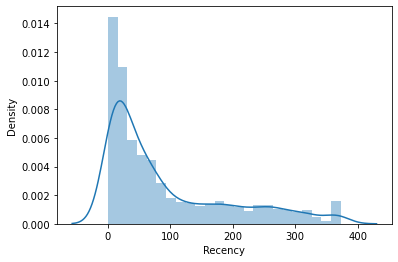

In [22]:
# Distribution plot

sns.distplot(RFMScores['Recency'])

Data is right skewed

#### (Frequency)

In [23]:
# Descriptive Statistics 

RFMScores['Frequency'].describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

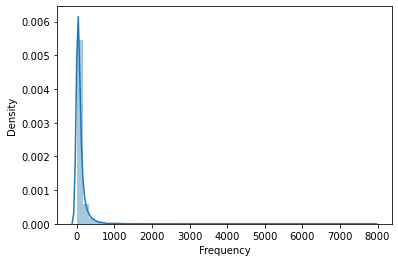

In [24]:
# Distribution plot

sns.distplot(RFMScores['Frequency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

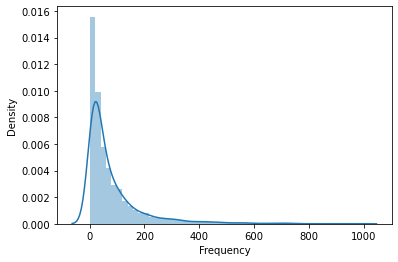

In [25]:
x = RFMScores.query('Frequency < 1000')['Frequency']
sns.distplot(x)

#### (Monetary)

In [26]:
# Descriptive Statistics 

RFMScores['Monetary'].describe()

count      3921.000000
mean       1863.910113
std        7481.922217
min           0.000000
25%         300.040000
50%         651.820000
75%        1575.890000
max      259657.300000
Name: Monetary, dtype: float64

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

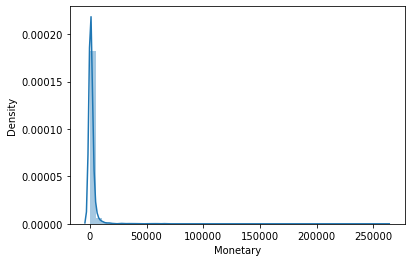

In [27]:
# Distribution plot

sns.distplot(RFMScores['Monetary'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

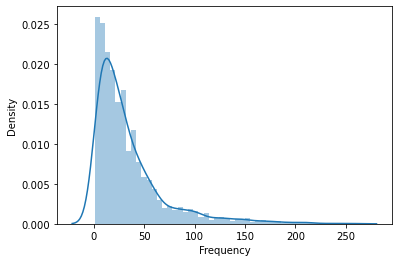

In [28]:
x = RFMScores.query('Monetary < 1000')['Frequency']
sns.distplot(x)

### **Quantile Segmentation**

In [29]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [30]:
def R_Scoring(x,i):
    if x <= quantiles[i][0.25]:
        return 1
    elif x <= quantiles[i][0.50]:
        return 2
    elif x <= quantiles[i][0.75]:
        return 3
    else:
        return 4
    
def FnM_Scoring(x,i):
    if x <= quantiles[i][0.25]:
        return 4
    elif x <= quantiles[i][0.50]:
        return 3
    elif x <= quantiles[i][0.75]:
        return 2
    else:
        return 1
    
    
RFMScores['R'] = RFMScores['Recency'].apply(lambda x: R_Scoring(x,'Recency'))
RFMScores['F'] = RFMScores['Frequency'].apply(lambda x: FnM_Scoring(x,'Frequency'))
RFMScores['M'] = RFMScores['Monetary'].apply(lambda x: FnM_Scoring(x,'Monetary'))
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [31]:
# Add RFM Group and calculate it's values

RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate RFM scores

RFMScores['RFMScore'] = RFMScores[['R','F','M']].sum(axis=1)

RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5


The lower the score, the more loyal and engaged the customer is

### **Assign Loyalty level to each customer**

In [32]:
Loyalty = ['Platinum','Gold','Silver','Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q=4, labels=Loyalty)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum


In [33]:
# Validate data for group = 111
RFMScores[RFMScores['RFMGroup'] == '111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
5,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
6,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum
7,13089.0,2,1818,58825.83,1,1,1,111,3,Platinum
8,15769.0,7,130,56252.72,1,1,1,111,3,Platinum
9,15061.0,3,403,54534.14,1,1,1,111,3,Platinum


111 are the best customers and can be encouraged to apply for loyalty programs
444 can be offered coupons or rewards for they are almost churning out

### K - Means Clustering

#### Normalizing Data

In [34]:
# Convert -ve & 0 values so as to handle infinite nos during log transformation.
def handle_negatives(num):
    if num <=0:
        return 1
    else:
        return num

RFMScores['Recency'] = [handle_negatives(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_negatives(x) for x in RFMScores.Monetary]

# Perform log transformation to normalise data

log_transformed = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis=1).round(3)

<AxesSubplot:xlabel='Recency', ylabel='Density'>

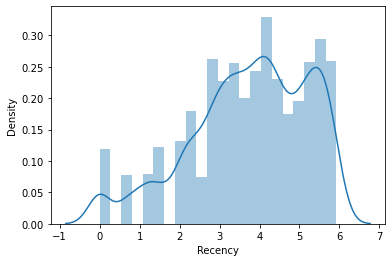

In [35]:
# Check distribution for Recency

Recent_plot = log_transformed['Recency']
sns.distplot(Recent_plot)

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

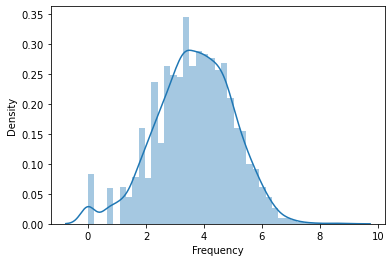

In [36]:
# Check distribution for Frequency

Frequent_plot = log_transformed['Frequency']
sns.distplot(Frequent_plot)

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

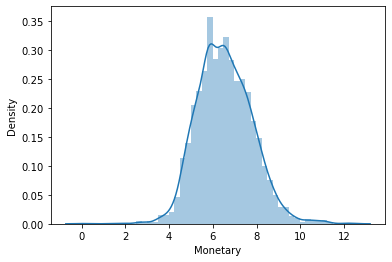

In [37]:
# Check distribution for Monetary

Monetary_plot = log_transformed['Monetary']
sns.distplot(Monetary_plot)

#### Standardizing data

In [38]:
scale = StandardScaler()

scaled_data = scale.fit_transform(log_transformed)

scaled_data = pd.DataFrame(scaled_data, index=RFMScores.index, columns=log_transformed.columns)

#### Clustering

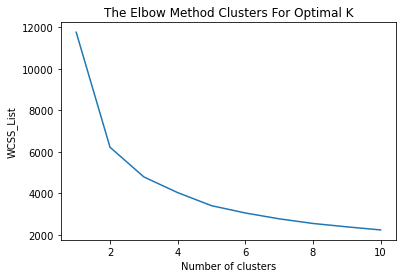

In [39]:
wcss_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(scaled_data)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss_list)
plt.title('The Elbow Method Clusters For Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_List')
plt.show()

The elbow points at 3; therefore, we'll have 3 clusters

In [40]:
kmeans = KMeans(n_clusters=4, init='k-means++')
kmeans.fit(scaled_data)
y_predict = kmeans.predict(scaled_data)

In [41]:
RFMScores['Clusters'] = y_predict
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Clusters
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12747.0,2,103,4196.01,1,1,1,111,3,Platinum,1
12748.0,1,4596,33719.73,1,1,1,111,3,Platinum,1
12749.0,3,199,4090.88,1,1,1,111,3,Platinum,1
12820.0,3,59,942.34,1,2,2,122,5,Platinum,1
12821.0,214,6,92.72,4,4,4,444,12,Bronze,3
12822.0,70,46,948.88,3,2,2,322,7,Gold,2
12823.0,74,5,1759.50,3,4,1,341,8,Gold,3
12824.0,59,25,397.12,3,3,3,333,9,Silver,0


#### Visualizing Clusters

In [42]:
np.unique(y_predict)

array([0, 1, 2, 3])

# kmeans = KMeans(n_clusters = 6, init = 'k-means++')
# ypred = kmeans.fit_predict(scaled_data)

ax = plt.axes(projection='3d')
plt.gcf().set_size_inches(15,15)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

color = ['blue','red','green','cyan','magenta','orange']

ax.scatter3D(scaled_data[y_predict == 0, 0], scaled_data[y_predict == 0, 1], scaled_data[y_predict == 0, 2], c = color[0], s = 10);
ax.scatter3D(scaled_data[y_predict == 1, 0], scaled_data[y_predict == 1, 1], scaled_data[y_predict == 1, 2], c = color[1], s = 10);
ax.scatter3D(scaled_data[y_predict == 2, 0], scaled_data[y_predict == 2, 1], scaled_data[y_predict == 2, 2], c = color[2], s = 10);
# ax.scatter3D(scaled_data[y_predict == 3, 0], scaled_data[y_predict == 3, 1], scaled_data[y_predict == 3, 2], c = color[3], s = 10);
# ax.scatter3D(scaled_data[y_predict == 4, 0], scaled_data[y_predict == 4, 1], scaled_data[y_predict == 4, 2], c = color[4], s = 10);
# ax.scatter3D(scaled_data[y_predict == 5, 0], scaled_data[y_predict == 5, 1], scaled_data[y_predict == 5, 2], c = color[5], s = 10);

ax.scatter3D(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker="*", s = 250, c = 'black', label = 'Centroid')
plt.show()

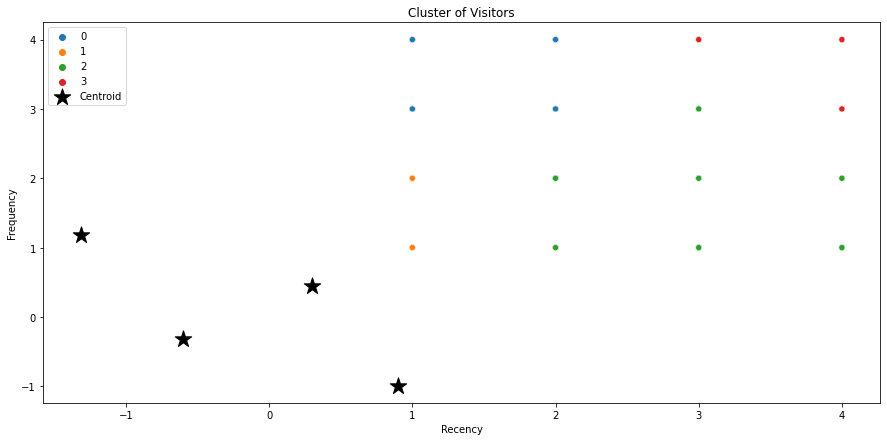

In [43]:
sns.scatterplot(x='R', y='F',data=RFMScores, hue='Clusters', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroid', marker='*')
plt.title('Cluster of Visitors')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.gcf().set_size_inches(15,7)
plt.legend()
plt.show()

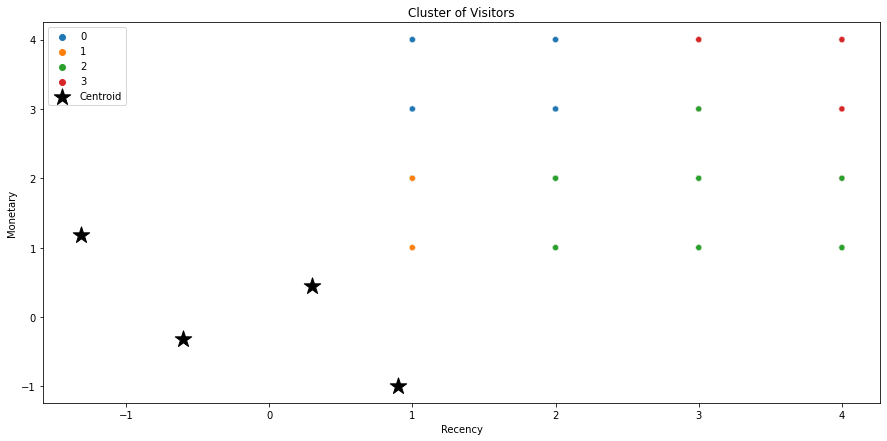

In [44]:
sns.scatterplot(x='R', y='M',data=RFMScores, hue='Clusters', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroid', marker='*')
plt.title('Cluster of Visitors')
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.gcf().set_size_inches(15,7)
plt.legend()
plt.show()

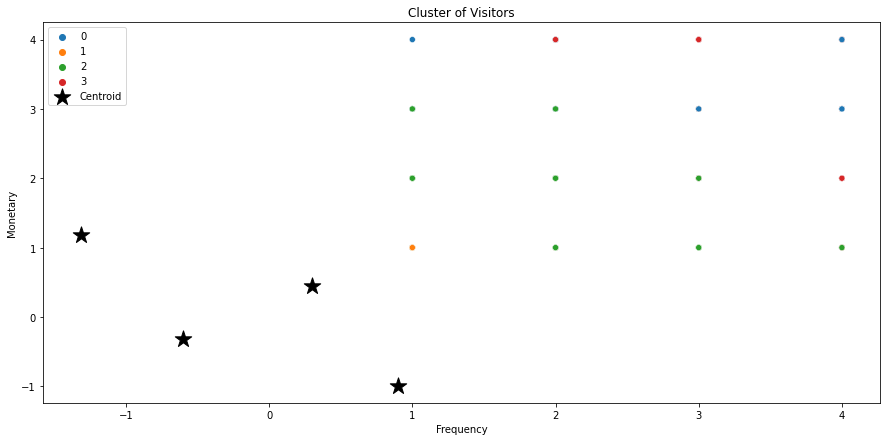

In [45]:
sns.scatterplot(x='F', y='M',data=RFMScores, hue='Clusters', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', label='Centroid', marker='*')
plt.title('Cluster of Visitors')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.gcf().set_size_inches(15,7)
plt.legend()
plt.show()